In [1]:
import pickle as pk

In [48]:
pkl_file=open('DK43.pkl','rb')
D=pk.load(pkl_file)
D.keys()

dict_keys(['Background', '3D boxes', 'Boxes locations', 'Feature names'])

In [49]:
Back=D['Background']
Back.shape

(20, 2000)

In [50]:
D['Boxes locations'][0]

[25154, 17654, 187]

In [8]:
names=D['Feature names']

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
P=arange(0,1,1/2000)
P.shape

(2000,)

In [65]:
def plot_CDF(cdf,label):
    P=arange(0,1,1/cdf.shape[0])
    plot(cdf,P,label=label);

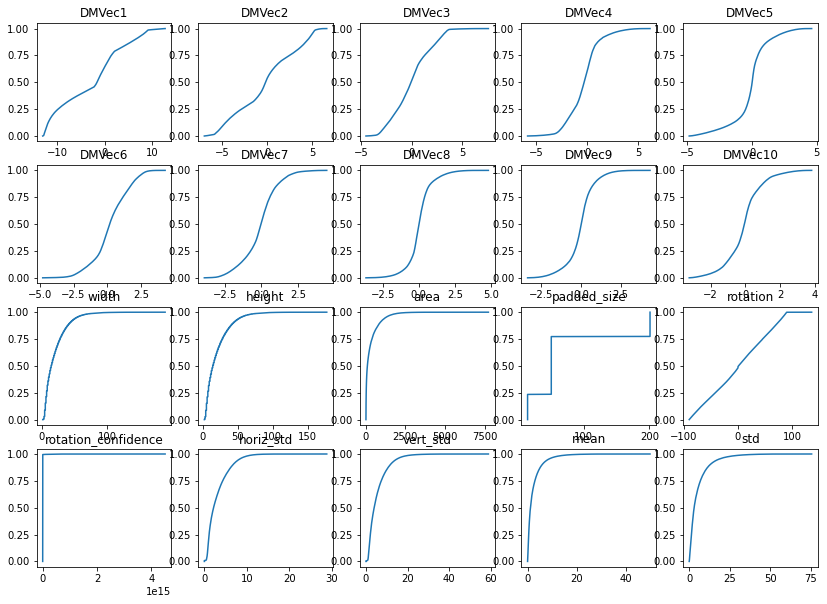

In [66]:
figure(figsize=[14,10])
for i in range(20):
    subplot(4,5,i+1)
    plot_CDF(Back[i,:],names[i]);
    title(names[i])

In [67]:
L=[]
for CDF in D['3D boxes']:
    L.append(CDF.shape[1])
len(L)

2085

In [68]:
max(L),sum(L)

(275, 251847)

In [69]:
#The python function that you use to measure the KS distance is 
# scipy.stats.ks_2samp(x1, x2, mode='asymp'), 
# available for different length cdfs.

In [70]:
from scipy.stats import ks_2samp

In [168]:
names[14]

'rotation'

In [179]:
for i in range(100): #len(D['3D boxes'])):
    Fore=D['3D boxes'][i]
    for j in range(20):
        cdf1=Fore[j,:]
        cdf2=Back[j,:]
        pval=ks_2samp(cdf1,cdf2).pvalue
        if(pval<0.0001):
            if names[j] in ['mean','std']:
                continue
            _max,_max_val,vals,cumulative = calc_cdf_max_diff(cdf1,cdf2)
            print("%3d %20s: pval=%5.0g, ks_gap=%6.3f, gap_val=%6.3f"%(i,names[j],pval,_max,_max_val))

  2             rotation: pval=2e-06, ks_gap=-0.236, gap_val=36.564
  6                width: pval=2e-05, ks_gap=-0.217, gap_val=21.000
  6                 area: pval=6e-05, ks_gap=-0.196, gap_val=194.000
  6             rotation: pval=1e-07, ks_gap= 0.248, gap_val=-14.035
  6            horiz_std: pval=2e-05, ks_gap=-0.209, gap_val= 3.638
  6             vert_std: pval=9e-05, ks_gap=-0.193, gap_val= 5.115
  7                width: pval=6e-07, ks_gap=-0.254, gap_val=19.000
  7                 area: pval=7e-08, ks_gap=-0.262, gap_val=230.000
  7             rotation: pval=7e-14, ks_gap= 0.349, gap_val=-15.698
  7            horiz_std: pval=1e-06, ks_gap=-0.238, gap_val= 2.244
  8             rotation: pval=7e-05, ks_gap= 0.218, gap_val=-21.075
 10               DMVec4: pval=9e-05, ks_gap= 0.205, gap_val=-1.042
 10                 area: pval=9e-06, ks_gap=-0.229, gap_val=195.000
 10            horiz_std: pval=1e-05, ks_gap=-0.226, gap_val= 3.076
 11                 area: pval=1e-05, ks_g

2 KstestResult(statistic=0.23638372093023255, pvalue=1.9507849672306676e-06)
6 KstestResult(statistic=0.2478450704225352, pvalue=1.1717176795489337e-07)
7 KstestResult(statistic=0.349324427480916, pvalue=6.80566714095221e-14)


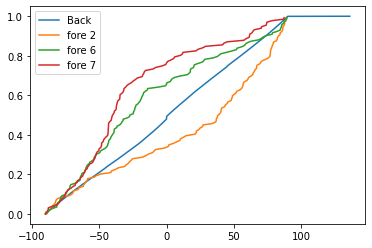

In [181]:
feature=14
plot_CDF(Back[feature,:], 'Back')
for i in range(10): #len(D['3D boxes'])):
    Fore=D['3D boxes'][i]
    ks=ks_2samp(Fore[feature,:],Back[feature,:])
    pval=ks.pvalue
    if pval<0.00001:
        print(i,ks)
        plot_CDF(Fore[feature,:], 'fore '+str(i))
        legend()


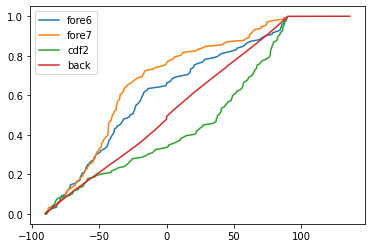

In [188]:
Fore=D['3D boxes'][6]
cdf6=Fore[feature,:]
Fore=D['3D boxes'][7]
cdf7=Fore[feature,:]
Fore=D['3D boxes'][2]
cdf2=Fore[feature,:]
cdfb=Back[feature,:]
plot_CDF(cdf6,'fore6')
plot_CDF(cdf7,'fore7')
plot_CDF(cdf2,'cdf2')
plot_CDF(cdfb,'back')
legend()

In [185]:
_max,_max_val,vals,cumulative = calc_cdf_max_diff(cdf7,cdf2)
_max,_max_val

(0.2478450704225346, -14.034825726526533)

In [171]:
def calc_cdf_max_diff(cdf1,cdf2):
    l=cdf1.shape[0]
    ones=np.ones(l)/l
    combined1=np.stack([cdf1,ones],axis=1)

    l=cdf2.shape[0]
    ones=-np.ones(l)/l
    combined2=np.stack([cdf2,ones],axis=1)

    full=np.concatenate([combined1,combined2])
    sorted_full = full[np.argsort(full[:, 0])]
    cumulative=cumsum(sorted_full[:,1])
    _argmax=argmax(abs(cumulative))
    _max=cumulative[_argmax]
    _max_val=sorted_full[_argmax,0]
    return _max,_max_val,sorted_full[:,0],cumulative

In [190]:
ks_2samp(cdfb,cdf6),ks_2samp(cdfb,cdf7),ks_2samp(cdf7,cdf6),

(KstestResult(statistic=0.2478450704225352, pvalue=1.1717176795489337e-07),
 KstestResult(statistic=0.349324427480916, pvalue=6.80566714095221e-14),
 KstestResult(statistic=0.17234705945597248, pvalue=0.029649968840397056))

(0.2478450704225346, 1.1717176795489337e-07)

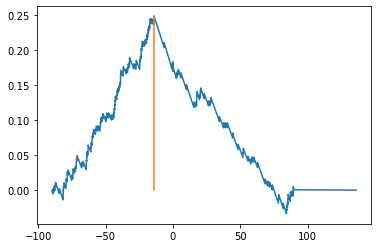

In [173]:
plot(vals,cumulative)
plot([_max_val,_max_val],[0,_max])
_max,pval

In [125]:
_max=argmax(cumulative)
sorted_full[_max,0]

-11.395167831485042

### distribution of cell counts

In [194]:
boxes=D['3D boxes']
sizes=[]
for box in boxes:
    sizes.append(box.shape[1])
len(sizes)
                 

2085

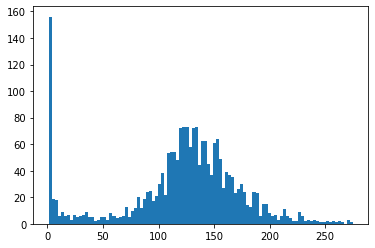

In [196]:
hist(sizes,bins=100);

In [198]:
sizes=array(sizes)
sizes50 = sizes[sizes>50]

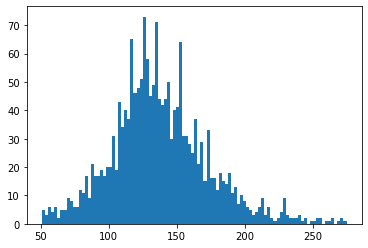

In [199]:
hist(sizes50,bins=100);

In [200]:
mean(sizes50), std(sizes50)

(137.80741560597676, 35.68252205189376)